In [2]:
import numpy as np
from keras.layers import Conv2D, MaxPool2D, Dense, Flatten, Dropout
from tensorflow.keras import Sequential, layers
from tensorflow.keras.layers import Rescaling
from tensorflow.keras import Input
import matplotlib.pyplot as plt
import tensorflow as tf
import seaborn as sns
import efficientnet.keras as efn

from pneumonia.ml_logic.preprocessor import train_generator, val_generator, test_generator
from pneumonia.ml_logic.baseline import compile, fitting

In [3]:
def eff_net():
    eff_net = efn.EfficientNetB0(input_shape = (256, 256, 3), include_top = False, weights = 'imagenet')    
    eff_net.trainable = False
    input_dim = (256,256,3)
    scale = (1./255.)
    model = Sequential([
        eff_net,
        Input(shape=input_dim),
        Rescaling(scale),
        Flatten(),
        Dense(32, activation="relu"),
        Dropout(0.2),
        Dense(1, activation='sigmoid')
    ])
    
    return model

In [4]:
eff_model = eff_net()

2023-03-27 11:38:33.537249: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:306] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2023-03-27 11:38:33.537404: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:272] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)


Metal device set to: Apple M2 Pro

systemMemory: 16.00 GB
maxCacheSize: 5.33 GB



In [5]:
compile(eff_model)

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 efficientnet-b0 (Functional  (None, 8, 8, 1280)       4049564   
 )                                                               
                                                                 
 input_2 (InputLayer)        multiple                  0         
                                                                 
 rescaling (Rescaling)       (None, 8, 8, 1280)        0         
                                                                 
 flatten (Flatten)           (None, 81920)             0         
                                                                 
 dense (Dense)               (None, 32)                2621472   
                                                                 
 dropout (Dropout)           (None, 32)                0         
                                                        

In [6]:
eff_model_history = fitting(eff_model)

Found 4716 files belonging to 2 classes.
Found 604 files belonging to 2 classes.
Epoch 1/20


2023-03-27 11:38:38.682954: W tensorflow/core/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz
2023-03-27 11:38:41.256446: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


148/148 [==============================] - ETA: 0s - loss: 0.4210 - accuracy: 0.4092 - recall: 0.2104

2023-03-27 11:39:05.026105: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


148/148 [==============================] - 30s 156ms/step - loss: 0.4210 - accuracy: 0.4092 - recall: 0.2104 - val_loss: 0.7219 - val_accuracy: 0.2632 - val_recall: 0.0000e+00
Epoch 2/20
148/148 [==============================] - 20s 135ms/step - loss: 0.2658 - accuracy: 0.5180 - recall: 0.4632 - val_loss: 0.7734 - val_accuracy: 0.7285 - val_recall: 0.8494
Epoch 3/20
148/148 [==============================] - 20s 135ms/step - loss: 0.2683 - accuracy: 0.7778 - recall: 0.9316 - val_loss: 0.6882 - val_accuracy: 0.7384 - val_recall: 0.8787
Epoch 4/20
148/148 [==============================] - 20s 134ms/step - loss: 0.2352 - accuracy: 0.7971 - recall: 0.9203 - val_loss: 0.7004 - val_accuracy: 0.7334 - val_recall: 0.8112
Epoch 5/20
148/148 [==============================] - 20s 134ms/step - loss: 0.2272 - accuracy: 0.8034 - recall: 0.9200 - val_loss: 0.6624 - val_accuracy: 0.7434 - val_recall: 0.8337
Epoch 6/20
148/148 [==============================] - 21s 139ms/step - loss: 0.2136 - accura

In [7]:
model, history = eff_model_history

Text(0.5, 1.0, 'Accuracy Evolution')

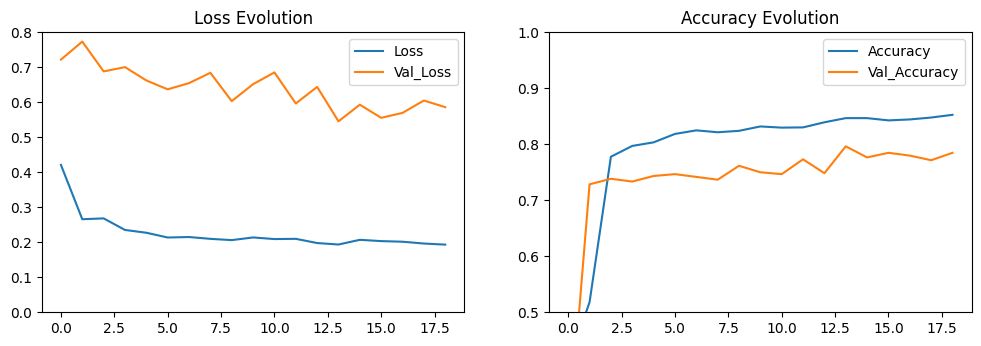

In [10]:
plt.figure(figsize=(12, 8))

plt.subplot(2, 2, 1)
plt.plot(history.history['loss'], label='Loss')
plt.plot(history.history['val_loss'], label='Val_Loss')
plt.ylim(0, 0.8)
plt.legend()
plt.title('Loss Evolution')

plt.subplot(2, 2, 2)
plt.plot(history.history['accuracy'], label='Accuracy')
plt.plot(history.history['val_accuracy'], label='Val_Accuracy')
plt.ylim(0.5,1)
plt.legend()
plt.title('Accuracy Evolution')